## CS-613: Machine Learning
## HW1
### John Obuch

#### Part 1: Theory

##### Problem 1a (see .tex PDF file for mathematical approach)

In [1]:
#import requirements
import numpy as np
import random
import copy

#define matrices (include bias term for X)
X = np.array([[1, -2], 
              [1, -5], 
              [1, -3], 
              [1, 0], 
              [1, -6], 
              [1, -2], 
              [1, 1], 
              [1, 5], 
              [1, -1], 
              [1, 3]])
Y = np.array([[1],
              [-4], 
              [1], 
              [3], 
              [11], 
              [5], 
              [0], 
              [-1], 
              [-3], 
              [1]])

# Compute mean and standard deviation
X_bar = np.mean(X.T, axis=1)
X_std = np.std(X.T, axis=1, ddof=1)

#set bias terms by setting the first index to the values outlined below to perform matrix ops without affecting standardization
X_bar[0] = 0
X_std[0] = 1

#standardize the data
X_stdz = copy.deepcopy(X)
X_stdz = ((X - X_bar)/X_std)

# Compute the parameters
params = np.dot(np.linalg.inv(np.dot(X_stdz.T, X_stdz)), np.dot(X_stdz.T, Y))

#return results to the screen
print('Mean and SD for X (2nd column):')
print('x_bar = '+str(X_bar[1]) +  '\nstd = ' + str(X_std[1]))
print("\nThe Prameters are: ")
print('Intercept: Theta_0 = '+str(params[0][0]))
print('Slope: Theta_1 = '+str(params[1][0]))


Mean and SD for X (2nd column):
x_bar = -1.0
std = 3.39934634239519

The Prameters are: 
Intercept: Theta_0 = 1.4000000000000001
Slope: Theta_1 = -1.5035570360594106


##### Problem 1b
Confirm your coefficient and intercept term from part (a) using the sklearn.linear-model LinearRegression function.

In [2]:
# Import requirements
from sklearn.linear_model import LinearRegression
import numpy as np

# Create linear regression object
lm = LinearRegression()

# define x and y vectors (x includes bias term)
X = np.array([[1, -2], 
          [1, -5], 
          [1, -3], 
          [1, 0], 
          [1, -6], 
          [1, -2], 
          [1, 1], 
          [1, 5], 
          [1, -1], 
          [1, 3]])

Y = np.array([[1],
              [-4],
              [1],
              [3],
              [11],
              [5],
              [0],
              [-1],
              [-3],
              [1]])

#compute mean and standard deviation (note: X.T is same as X.transpose())
x_bar = np.mean(X.transpose(), axis=1)
x_std = np.std(X.T, axis=1, ddof=1)

#Establishing column values for mean of zero and std of 1 for matrix ops belo
x_bar[0] = 0
x_std[0] = 1

#standardize the data
X_stdz = ((X - x_bar)/x_std)

# Fit the model
lm.fit(X_stdz, Y)

# Return slope and intercept (i.e. theta_1 and theta_0 respectively)
print("Slope: ",lm.coef_[0][1])
print("Intercept: ", lm.intercept_[0])

Slope:  -1.503557036059411
Intercept:  1.4


##### Problem 2a and 2b 
(See .tex PDF file for mathematical theory solutions to problems 2a and 2b.

#####  Problem 2a code

In [3]:
#import requirements
import sympy as sym

#define the symbol x
x = sym.symbols('x')

#define the function g(x)
g_x = (x-1)**4

#compute the gradient using the sympy module
grad = sym.diff(g_x,x)

#return the result to the screen
print("\nthe gradient with respect to x")
print(grad)


the gradient with respect to x
4*(x - 1)**3


##### Part 2b code

In [4]:
# Obtain the x value (i.e. critcal point) corresponding to the global minima for g(x) 
#(i.e. solve for g'(x) = 0 and sub in result into g(x) to get y coordinate)

#compute the critical value
cv = sym.solve(grad,x)[0]

#sub in critical value to obtain y-coordinate
y = (cv-1)**4

#create a tuple of the (x,y) point
min_point = (cv,y)

#return the results to the screen
print("The critical value for x is: " + str(cv))
print("The global minima is at the point (x,y) = "+str(min_point))

The critical value for x is: 1
The global minima is at the point (x,y) = (1, 0)


##### Problem 2c

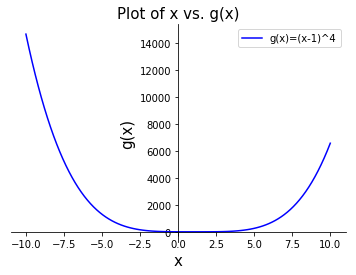

In [5]:
#import requirements
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# 100 linearly spaced numbers with x domain [-10, 10]
x = np.linspace(-10,10,100)

# define the function, y = (x-1)^4
y = (x-1)**4

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
_ = plt.plot(x,y, 'b', label='g(x)=(x-1)^4')

#set the legend position
_ = plt.legend(loc='upper right')

# ## Set the title
_ = plt.title("Plot of x vs. g(x)", fontsize = 15)

## Set the y-label
_ = plt.ylabel("g(x)", fontsize = 15)

## Set the x-label
_ = plt.xlabel("x", fontsize = 15)

# show the plot
_ = plt.show()

#### Part 2: Closed Form Linear Regression

In [6]:
#Import module requirements
import numpy as np
import csv
import random
import copy
import math

#define the function
def params_and_RMSE(csv_file):
    
    '''This function takes in a csv file as a string and returns
    the parameters of the linear regression model and the RMSE.
    Note that the file must be in the following format:
    @(index, independent_var1, independent_var2,..., independent_varN, dependent_var),
    (i.e. First row of file has header information, 
    the ﬁrst column be some integer index, 
    then D columns of real-valued features X, 
    and then ending with a target value Y).'''
    
    #read in the data into a matrix
    with open(csv_file) as file_csv:
        data = csv.reader(file_csv)
        matrix = []
        for row in data:
            matrix.append(row)

        # delete the first row (header) and first column (index)
        matrix = np.delete(matrix, 0, axis=0) # row
        matrix = np.delete(matrix, 0, axis=1) #column

        #convert element data types from str to float
        matrix = matrix.astype(np.float)

        #randomize the rows of the matrix with a seed of zero (seeding ensures same output each run!)
        np.random.seed(0)
        np.random.shuffle(matrix)

        # compute the size of the (2/3), (1/3) train/test split sets
        #Approach 1
        tot_rows = len(matrix)
        train_size = int((2/3) * tot_rows) + 1
        test_size = int((1/3) * tot_rows)
        N_x_vars = matrix.shape[1] - 1 #Including bias term!

        #split data into train/test

        #create n-D array matrices with appropriate size/dimensions
        M_Train_X = np.ndarray((train_size, N_x_vars), dtype = object)
        M_Test_X = np.ndarray((test_size, N_x_vars), dtype = object)
        
        #convert all rows and all columns to float data types
        M_Train_X[:, :] = float() #training data
        M_Test_X[:, :] = float() #testing data
        
        #Build the X matrices and Y vectors for train and test
        
        #X train/test
        M_Train_X = copy.deepcopy(matrix[0:train_size, 0:N_x_vars])
        M_Test_X = copy.deepcopy(matrix[train_size:tot_rows, 0:N_x_vars])
        
        #Y train/test
        M_Train_Y = np.array([copy.deepcopy(matrix[0:train_size, N_x_vars])]).transpose()
        M_Test_Y = np.array([copy.deepcopy(matrix[train_size:tot_rows, N_x_vars])]).transpose()

        #create vector of ones for train and test (bias feature)
        bias_feature_train = np.ones(M_Train_X.shape[0])
        bias_feature_test = np.ones(M_Test_X.shape[0])

        #insert vector of ones as first column of X such that  X contains bias feature
        M_Train_X = np.column_stack([bias_feature_train, M_Train_X]) 
        M_Test_X = np.column_stack([bias_feature_test, M_Test_X]) 

        # compute mean and standard deviation of the X training set
        X_bar = np.mean(M_Train_X.transpose(), axis=1)
        X_std = np.std(M_Train_X.transpose(), axis=1, ddof = 1)

        #Set the bias feature stats to perform matrix ops for computing the standardization
        X_bar[0] = 0
        X_std[0] = 1

        #standardize X train/test
        M_Train_X_stdz = (M_Train_X - X_bar)/X_std
        M_Test_X_stdz = (M_Test_X - X_bar)/X_std

        #compute params (i.e. theta_i's) --> (XTX)^-1XTY
        #NOTE: .transpose() is same as .T
        XTX_inv = np.linalg.inv(np.dot(M_Train_X_stdz.T, M_Train_X_stdz))
        XTY = np.dot(M_Train_X_stdz.transpose(), M_Train_Y)
        params = np.dot(XTX_inv, XTY)
    
        #compute Y_hat of the testing data
        Y_hat_test = np.dot(M_Test_X_stdz, params)

        #compute Root Mean Squared Error (RMSE)
        N_minus1 = len(Y_hat_test) - 1
        RMSE = np.sqrt((1/N_minus1)*sum((M_Test_Y - Y_hat_test)**2))[0]
        
        #return params and RMSE to the screen
        print('Parameters:')
        for i, par in enumerate(params):
            print('theta_' + str(i) + ' = ' + str(par[0]))
        print('\nRMSE: ' + str(RMSE))

In [7]:
#User/Grader can change CSV file name here...
results = params_and_RMSE('x06Simple(1).csv')

#return the results to the screen
results

Parameters:
theta_0 = 3275.6666666666665
theta_1 = 1097.6031269367272
theta_2 = -259.3278905093662

RMSE: 624.652582076977


Based on our results above, we see that our final model is as follows:

$\hat{Y} = 3275.6667 + 1097.6031\mathbf{X_1} -259.3279\mathbf{X_2}$ with $\text{RMSE} = 624.6526$.

__Note:__ Model will change based on output from file input and the setting of the random seed.

#### Part 3: S-Folds Cross-Validation

#### PART 3: Using Sklearn

In [8]:
#import module requirements
import numpy as np
import csv
import random
from pprint import pprint
from sklearn.model_selection import KFold

#define the function
def KFolds_Cross_Validation(csv_file):
    
    '''This function takes in csv file and performs Linear Regression
    using K-Folds Cross Validation and returns the following metrics:
    
    1) Number of folds
    2) RMSE Mean
    3) RMSE Standard Deviation'''

    #read in the file as a matrix
    with open(csv_file) as file_csv:
        data = csv.reader(file_csv)
        matrix = []
        for row in data:
            matrix.append(row)

        #Delete first row (header) and column (index) from matrix
        matrix = np.delete(matrix, 0, axis = 0) #row axis
        matrix = np.delete(matrix, 0, axis = 1) #column axis

        #compute total rows/records and number of X_vars
        num_rows = matrix.shape[0]
        N_x_vars = matrix.shape[1] - 1

        #convert data types from str to float
        matrix = matrix.astype(np.float)

        #define folds to itterate through
        k_folds = [3,5,20, num_rows]
        
        #create an empty list to append results to
        rslt_List = []

        #itterate through the folds
        for k in k_folds:
            
            #create a list to append the RMSE results to
            RMSE_Results = []
            
            #do this 20 times
            for seed in range(20):
                
                #create an empty list to append sq_Error results to
                sqErr = []
                
                #compute the number of folds using sklearn
                kf = KFold(n_splits = k, shuffle = True, random_state = seed)
                N_splits = kf.get_n_splits(matrix)
                s = kf.split(matrix)
                
                #split the data into training and testing sets
                for train_index, test_index in s:
                    Train, Test = matrix[train_index], matrix[test_index]

                    #Create X matrix for train and test sets
                    X_Train = Train[:, 0:N_x_vars]
                    X_Test = Test[:, 0:N_x_vars]

                    #create vector of ones (bias feature)
                    bias_feature_train = np.ones(X_Train.shape[0])
                    bias_feature_test = np.ones(X_Test.shape[0])

                    #insert vecotor of ones as first column of x such that  X contains bias feature
                    X_Train = np.column_stack([bias_feature_train, X_Train]) 
                    X_Test = np.column_stack([bias_feature_test, X_Test]) 

                    #Create Y Vectors for train and test sets
                    Y_Train = Train[:,-1]
                    Y_Test = Test[:,-1]

                    #compute mean and std of training set
                    X_Bar_Train = np.mean(X_Train.T, axis = 1)
                    X_SD_Train = np.std(X_Train.T, axis = 1, ddof = 1)

                    #Set the bias feature stats to perform matrix ops for computing the standardization
                    X_Bar_Train[0] = 0
                    X_SD_Train[0] = 1

                    #standardize the X train and test data
                    X_stdz_Train = (X_Train - X_Bar_Train)/X_SD_Train
                    X_stdz_Test = (X_Test - X_Bar_Train)/X_SD_Train

                    #compute the parameters of the model (i.e. theta_i's)
                    params = np.dot(np.linalg.inv(np.dot(X_stdz_Train.T, X_stdz_Train)), np.dot(X_stdz_Train.T, Y_Train))
                    
                    #compute the prediction values of the test data
                    Y_hat_Test = np.dot(X_stdz_Test, params)
                    
                    #compute the SSE and append it to the sqErr list
                    Y_hat_Test_sqError = (Y_Test - Y_hat_Test) ** 2
                    sqErr += list(Y_hat_Test_sqError)
                    
                #compute the RMSE
                RMSE = np.sqrt(np.mean(sqErr))
                
                #append the RMSE results to the RMSE_Results list
                RMSE_Results.append(RMSE)
            
            #compute the mean RMSE, RMSE std, capture the fold number and append to rslt_list
            Ave_RMSE = np.mean(RMSE_Results)
            SD_RMSE = np.std(RMSE_Results)
            K_Folds = k
            rslt_List.append([K_Folds,Ave_RMSE,SD_RMSE])
        
        #return the results
        print("S_Fold, RMSE Mean, RMSE SD:")
        pprint(rslt_List)



In [9]:
#USER/GRADER can change file name here...
results = KFolds_Cross_Validation('x06Simple(1).csv')

#return the results to the screen
results

S_Fold, RMSE Mean, RMSE SD:
[[3, 637.899993071652, 30.554833512620426],
 [5, 627.1529138931062, 14.421816082557156],
 [20, 622.323458667071, 6.379327937120033],
 [44, 623.405139183103, 3.595093471822542e-14]]


#### Part 4: Locally-Weighted Linear Regression

In [10]:
#import requirements
import numpy as np
import csv
import random
from pprint import pprint
from sklearn.model_selection import train_test_split

#define the function
def LW_Linear_Regression(csv_file):
    
    '''This function takes in a csv file in the following form:
    (index, x1, x2, ... xn, y) and performs Locally Weighted Linear Regression
    and returns the Root Mean Squared Error'''

    #read in the data and store the rows into list-of-lists (matrix)
    with open(csv_file) as file_csv:
        data = csv.reader(file_csv)
        matrix = []
        for row in data:
            matrix.append(row)

        #Cast matrix to a numpy array
        matrix = np.array(matrix)

        #delete first row (header) and first column (index)
        matrix = np.delete(matrix, 0, axis = 0) #row
        matrix = np.delete(matrix, 0, axis = 1) #column

        #convert data types from str to float
        matrix = matrix.astype(np.float)

        #create vector of ones (bias feature)
        bias_feature = np.ones(matrix.shape[0])

        #Define X (including bias feature) and Y arrays
        X = np.column_stack([bias_feature, matrix[:, 0:matrix.shape[1] - 1]])
        Y = matrix[:, [-1]]

        #Split the data into train/test (2/3) and (1/3) respectively
        #and randomize the data with a seed of 0 using sklearn
        X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=0) 

        #compute mean and standard deviation
        X_bar_train = np.mean(X_train, axis = 0)
        X_std_train = np.std(X_train, axis = 0, ddof = 1)

        #Set the bias feature stats to perform matrix ops for computing the standardization
        X_bar_train[0] = 0
        X_std_train[0] = 1

        #standardize the data
        X_train_stdz = (X_train - X_bar_train)/X_std_train
        X_test_stdz = (X_test - X_bar_train)/X_std_train

        #define k = 1
        k = 1

        #create empty list to store prediction values
        Y_hat = []
        
        #iterate through the rows and compute the W matrix diagonal values
        for row in range(X_test_stdz.shape[0]):
            lamda = np.array([np.exp(-1*(np.linalg.norm(X_train_stdz - X_test_stdz[row,:], ord = 1, axis=1)/k**2))])

            #create/initialize the (m x m) W matrix of zeros 
            W = np.zeros((X_train_stdz.shape[0], X_train_stdz.shape[0]), dtype = float)

            #fill the diagonal of the W matrix with the values of lambda
            #(i.e. the Gaussian similarity metric)
            np.fill_diagonal(W, lamda)

            #compute XTWX_inv and XTWX
            XTWX_inv = np.linalg.inv(np.dot(X_train_stdz.T, np.dot(W, X_train_stdz)))
            XTWY = np.dot(X_train_stdz.T, np.dot(W, Y_train))

            #compute the parameters
            params = np.dot(XTWX_inv, XTWY)

            #append the predicted values to Y_hat list
            Y_hat.append(np.dot(X_test_stdz[row,:], params))

        #cast the Y_hat list to a numpy array (vector)
        Y_hat = np.array(Y_hat)

        #compute SSE (squared error) and RMSE
        SSE = (Y_test - Y_hat)** 2
        RMSE = np.sqrt(np.mean(SSE))

        #Return the RMSE result to the screen
        return print("Locally Weighted Linear Regression RMSE: " + str(RMSE))


In [11]:
#USER/GRADER can change csv file name here...
results = LW_Linear_Regression('x06Simple(1).csv')

#return the results to the screen
results

Locally Weighted Linear Regression RMSE: 521.2082220663401


#### Part 5: Batch Gradient Descent

In [12]:
#import requirements
import numpy as np
import csv
import random
%matplotlib inline 
from matplotlib import pyplot as plt

#define the function
def Batch_Gradient_Decent(csv_file):
    
    '''This function takes in a csv file in the following form:
    (index, x1, x2, ... xn, y) and performs Batch Gradient Decent
    and returns the final model parameters, the Root Mean Squared Error 
    of the testing data, and a graph of the training and testing data
    showing the convergence towards the optimal minima of the RMSE
    (i.e. plots the iteration number (x) against the RMSE value (y))'''
    
    #read in the file into matrix form
    with open(csv_file) as file_csv:
        data = csv.reader(file_csv)
        matrix = []
        for row in data:
            matrix.append(row)

        #cast list_of_lists to numpy array (i.e. matrix)
        matrix = np.array(matrix)

        #delete first row (header) and first column (index)
        matrix = np.delete(matrix, 0, axis = 0) #row
        matrix = np.delete(matrix, 0, axis = 1) #column

        #convert data types from str to float
        matrix = matrix.astype(np.float)

        #define X and Y arrays
        X = matrix[:, 0:matrix.shape[1]-1]
        Y = matrix[:, [-1]] #grab all rows but only last column vector

        #Split the data into train/test (2/3) and (1/3) respectively
        #and randomize the data with a seed of 0 using sklearn train_test_split
        X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=0)

        #define matrix object to store prediction values into
        Y_hat_train = np.zeros((Y_train[:,0].size, 1))
        Y_hat_test = np.zeros((Y_test[:,0].size, 1))

        #create vector of ones
        bias_feature_train = np.ones(X_train.shape[0])
        bias_feature_test = np.ones(X_test.shape[0])

        #Define X (including bias feature) arrays
        X_train = np.column_stack([bias_feature_train, X_train[:, 0:X_train.shape[1]]])
        X_test = np.column_stack([bias_feature_test, X_test[:, 0:X_test.shape[1]]])

        #compute mean and std of training data
        X_bar_train = np.mean(X_train.T, axis = 1)
        X_std_train = np.std(X_train.T, axis = 1, ddof = 1)

        #set first element values to perform matrix ops
        X_bar_train[0] = 0
        X_std_train[0] = 1

        #standardize the data
        X_stdz_train = (X_train - X_bar_train)/X_std_train
        X_stdz_test = (X_test - X_bar_train)/X_std_train

        #define the learning rate Eta
        eta = 0.01

        #since performing Batch Gradient Decent we need to compute eta/N
        #where N here is the size of the training batch
        eta_over_N = eta/X_train.shape[0]

        #set the threshold values so we know when to stop
        RMSE_thresh = 2**-23
        iter_thresh = 1000

        #set values of variables to compare to threshold values
        chg_in_RMSE_train = .1
        prev_RMSE = 1000
        iter_ = 1

        #create variable lists to store each iteration of the RMSE
        RMSE_train1 = []
        RMSE_test1 = []

        #Initialize the parameters of Theta using random values between [-1, 1]
        random.seed(1)
        theta = np.zeros((X_stdz_train.shape[1],1))
        for x_i in range(X_stdz_train.shape[1]):
            theta.itemset((x_i,0), np.random.uniform(-1,1))

        #perform Batch Gradient Decent until either convergence condition is met
        while (chg_in_RMSE_train > RMSE_thresh) and (iter_ < iter_thresh):

            #compute RMSE of testing data and append to the RMSE_test1 list
            Y_hat_test = np.dot(X_stdz_test, theta)
            SSE = (Y_test - Y_hat_test)**2
            RMSE_test1.append([iter_, np.sqrt(np.mean(SSE))]) 

            #compute RMSE of training data and append to the RMSE_train1 list
            Y_hat_train = np.dot(X_stdz_train, theta)
            Err = (Y_hat_train - Y_train)
            SSE = Err**2
            RMSE_train1.append([iter_, np.sqrt(np.mean(SSE))])

            #compute the gradient
            grad = np.dot(X_stdz_train.T, Err)

            #perform the update of theta
            theta = theta - eta_over_N*grad
            
            #update the percent change in the RMSE and the previous RMSE value
            chg_in_RMSE_train = abs((prev_RMSE - np.sqrt(np.mean(SSE)))/prev_RMSE)
            prev_RMSE = np.sqrt(np.mean(SSE))

            #incriment the iteration count
            iter_ += 1

        #return the final model parameters
        print("Final Model Parameters:")
        for i, par in enumerate(theta):
            print('theta_' + str(i) + ' = ' + str(par[0]))

        #compute the RMSE of the testing data and return the result to the screen
        Y_hat_test = np.dot(X_stdz_test, theta)
        SSE = (Y_hat_test - Y_test)**2
        test_RMSE = np.sqrt(np.mean(SSE))
        print("\nRMSE for Test Set:")
        print(test_RMSE)

        #plot the training set RMSE by iteration number
        RMSE_train1 = np.array(RMSE_train1)
        x, y = RMSE_train1.T
        plt.plot(x,y)
        plt.title("Training Set RMSE by iteration number")
        plt.xlabel("iteration")
        plt.ylabel("RMSE")
        plt.show()

        #plot the testing RMSE by iteration number
        RMSE_test1 = np.array(RMSE_test1)
        x, y = RMSE_test1.T
        plt.plot(x,y)
        plt.title("Testing Set RMSE by iteration number")
        plt.xlabel("iteration")
        plt.ylabel("RMSE")
        plt.show()


Final Model Parameters:
theta_0 = 2916.3262793834956
theta_1 = 1220.3517763987895
theta_2 = -279.3779822675999

RMSE for Test Set:
703.6394365160953


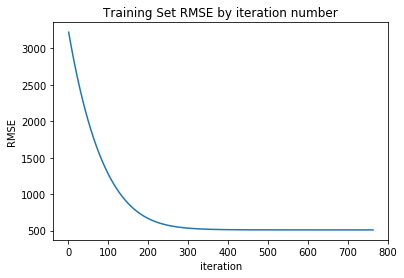

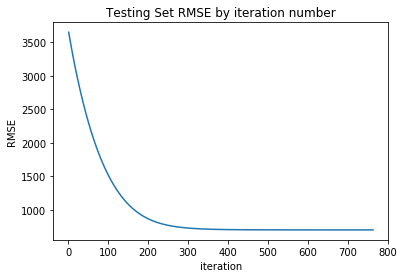

In [13]:
#USER/GRADER can change file name here...
results = Batch_Gradient_Decent('x06Simple(1).csv')

#return the results to the screen
results

__Note/Observation:__ The results from part 2 and part 5 should theoretically be identical. I would like to note here that the reason for the minor discrepency between the two results is due to how the data was randomized. To explain further, if the methods of randomization were to be performed the same way, the results would be identical between the two methods. For example, if I were to use sklearn (as used in part 5) to split the data in both methods, or if I were to split the data manually (as instructed in part 2) in both methods, the results would tie out. I tested this on the data, however due to homework specifications, part 2 does not allow for the use of sklearn, whereas part 5 does. Hence the minor descrepency in the results.